In [1]:
import rootpath
import sys
sys.path.append(rootpath.detect())
from push_world import push_8D
from testsuite.optimisers import Saf
from testsuite.surrogates import MultiSurrogate, GP
from testsuite.analysis import plot_all_pareto_2d

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
class push8:
    """Robot pushing simulation: Two robots pushing an object each.
    The objects' initial locations are at [-3, 0] and [3, 0] respectively,
    with the robot 1 pushing the first target and robot 2 pushing the second
    target. See paper for full problem details.
    Parameters
    ----------
    tx_1 : float
        x-axis location for the target of robot 1, should reside in [-5, 5].
    ty_1 : float
        y-axis location for the target of robot 1, should reside in [-5, 5].
    tx_2 : float
        x-axis location for the target of robot 2, should reside in [-5, 5].
    ty_2 : float
        y-axis location for the target of robot 2, should reside in [-5, 5].
    Examples
    --------
    >> f_class = push8
    >> # initial positions (tx_1, ty_1) and (tx_2, ty_2) for both robots
    >> tx_1 = 3.5; ty_1 = 4
    >> tx_2 = -2; ty_2 = 1.5
    >> # instantiate the test problem
    >> f = f_class(tx_1, ty_1, tx_2, ty_2)
    >> # evaluate some solution x in [0, 1]^8
    >> x = numpy.array([0.5, 0.7, 0.2, 0.3, 0.3, 0.1, 0.5, 0.6])
    >> f(x)
    array([24.15719287])
    """
    def __init__(self, t1_x=-5, t1_y=-5, t2_x=5, t2_y=5):
        self.dim = 8
        self.lb = np.array([-5, -5,   1, -5*np.pi, -5, -5,   1, -5*np.pi])
        self.ub = np.array([ 5,  5, 300, 5*np.pi,  5,  5, 300, 5*np.pi])

        # object target locations
        self.t1_x = t1_x
        self.t1_y = t1_y
        self.t2_x = t2_x
        self.t2_y = t2_y

        # initial object locations (-3, 0) and (3, 0)
        self.o1_x = -3
        self.o1_y = 0
        self.o2_x = 3
        self.o2_y = 0

        # optimum location unknown as defined by inputs
        self.yopt = np.array([0.])
        self.xopt = None

        self.cf = None

    def __call__(self, x):
        x = np.atleast_2d(x)

        val = np.zeros((x.shape[0], 2))
        for i in range(x.shape[0]):
            val[i, :] = push_8D(x[i, :],
                                self.t1_x, self.t1_y,
                                self.t2_x, self.t2_y,
                                self.o1_x, self.o1_y,
                                self.o2_x, self.o2_y,
                                draw=False)

        return val.ravel()

In [3]:
## establish objective function
func = push8()
x_limits = [func.lb, func.ub]
def test_function(x):
    return func(x)


In [4]:
surrogate = MultiSurrogate(GP, scaled=True)
opt = Saf(test_function, x_limits, surrogate,  n_initial=10, budget=20, seed=0, ei=False, log_dir="./log_data", cmaes_restarts=0, log_interval=10)

In [11]:
opt.optimise(20)

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 1/10, f = 71.12706990796966
Optimization restart 2/10, f = 255.82429036161443
Optimization restart 3/10, f = 71.12706990880979
Optimization restart 4/10, f = 71.1270699036879
Optimization restart 5/10, f = 1353356226.1071248
Optimization restart 6/10, f = 71.12706991310233
Optimization restart 7/10, f = 71.12706991201372
Optimization restart 8/10, f = 71.12706990525751
Optimization restart 9/10, f = 71.12706990661208
Optimization restart 10/10, f = 71.12706991125862


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 1/10, f = 78.40477021533479
Optimization restart 2/10, f = 258.3775824389459
Optimization restart 3/10, f = 78.40477021498049
Optimization restart 4/10, f = 78.40477021412596
Optimization restart 5/10, f = 78.4047702163262
Optimization restart 6/10, f = 258.3789151481742
Optimization restart 7/10, f = 467.2783943176133
Optimization restart 8/10, f = 78.40477021497034
Optimization restart 9/10, f = 258.37884235627604
Optimization restart 10/10, f = 467.2783943176133
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 8 (seed=278563, Wed Oct  7 22:10:37 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     10 6.332420111560549e-01 1.0e+00 2.54e-01  2e-01  3e-01 0:00.0
    2     20 6.332420015765460e-01 1.3e+00 2.68e-01  3e-01  3e-01 0:00.0
    3     30 6.332419938991768e-01 1.4e+00 3.21e-01  3e-01  4e-01 0:00.1
  100   1000 4.729631984757965e-01 2.8e+01 1.92e+00  3e-01  8e+00 0:01.7
  200   2000 1.345398926653961e-01 1.0e+02 2.04e-01  1

 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:
        geno-pheno transformation introduced based on the
        current covariance matrix with condition 1.0e+12 -> 1.0e+00,
        injected solutions become "invalid" in this iteration (class=CMAEvolutionStrategy method=alleviate_conditioning iteration=1506)


 1600  16000 1.339453809780892e-01 3.6e+01 5.08e+00  2e+00  1e+01 0:25.1
 1700  17000 1.339453798684067e-01 4.9e+02 4.45e+00  1e+00  1e+01 0:27.1
 1800  18000 1.339453791942090e-01 4.9e+03 9.11e+00  1e+00  3e+01 0:29.1
 1900  19000 1.339453788475264e-01 6.7e+03 6.78e+00  4e-01  2e+01 0:30.4
 2000  20000 1.339453787865115e-01 3.4e+04 1.02e+01  4e-01  2e+01 0:32.0
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
 2100  21000 1.339453787373381e-01 7.1e+04 1.22e+01  2e-01  2e+01 0:34.5
 2200  22000 1.339453786817542e-01 5.0e+04 4.37e+01  4e-01  3e+01 0:36.2
 2230  22300 1.339453786738949e-01 5.6e+04 2.88e+01  2e-01  2e+01 0:36.8


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Wed Oct  7 22:11:19 2020)
final/bestever f-value = 1.339454e-01 1.339454e-01
incumbent solution: [4.999999981640181, -0.4364519979440953, 88.22344257068471, -3.926185110467486, 0.6597303959530105, -1.3160197262154725, 94.44625798346533, -2.777371101956305]
std deviation: [3.0501101768397696, 16.93222561743651, 0.2006968126524752, 0.5069121618998349, 1.5009663824111166, 0.2480840726828412, 0.5189161216339331, 1.8616464991895953]
Optimization restart 1/10, f = 72.14785993562741
Optimization restart 2/10, f = 72.14785994100731
Optimization restart 3/10, f = 72.14785993251652
Optimization restart 4/10, f = 72.14785994206159
Optimization restart 5/10, f = 72.14785993238962
Optimization restart 6/10, f = 258.462413338606
Optimization restart 7/10, f = 473.9538040396573
Optimization restart 8/10, f = 473.9538032979331
Optimization restart 9/10, f = 72.14785993154567


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = 258.498347147045
Optimization restart 1/10, f = 78.98947274098231
Optimization restart 2/10, f = 473.9538040469459
Optimization restart 3/10, f = 78.98947274045544
Optimization restart 4/10, f = 78.98947274018099
Optimization restart 5/10, f = 78.98947273824827
Optimization restart 6/10, f = 78.98947273892757
Optimization restart 7/10, f = 260.5084575653074
Optimization restart 8/10, f = 78.98947273921142
Optimization restart 9/10, f = 78.98947274196422
Optimization restart 10/10, f = 78.98947274230335
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 8 (seed=121357, Wed Oct  7 22:11:26 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     10 6.215275645608975e-01 1.0e+00 2.53e-01  2e-01  3e-01 0:00.0
    2     20 6.215275645591315e-01 1.2e+00 2.74e-01  3e-01  3e-01 0:00.0
termination on tolfun=1e-11 (Wed Oct  7 22:11:26 2020)
final/bestever f-value = 6.215276e-01 6.215276e-01
incumbent solution: [2.9361738377586644, 0.68

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 1/10, f = 73.66697845661085
Optimization restart 2/10, f = 73.6669784610311
Optimization restart 3/10, f = 73.66697845611533
Optimization restart 4/10, f = 480.629211321324
Optimization restart 5/10, f = 73.66697845950225
Optimization restart 6/10, f = 73.66697846129937
Optimization restart 7/10, f = 73.66697845500454


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 8/10, f = 73.66697846275429
Optimization restart 9/10, f = 480.629211321324
Optimization restart 10/10, f = 480.629211321324
Optimization restart 1/10, f = 80.23977354204183
Optimization restart 2/10, f = 80.23977354509879
Optimization restart 3/10, f = 80.23977354502017
Optimization restart 4/10, f = 480.62921132859094
Optimization restart 5/10, f = 80.23977354699852
Optimization restart 6/10, f = 265.849598480254
Optimization restart 7/10, f = 80.2397735488058
Optimization restart 8/10, f = 80.23977354311505
Optimization restart 9/10, f = 80.23977354382446
Optimization restart 10/10, f = 480.62921132859094
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 8 (seed=207918, Wed Oct  7 22:11:29 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     10 6.323816652914741e-01 1.0e+00 2.47e-01  2e-01  3e-01 0:00.0
    2     20 6.323816652889297e-01 1.2e+00 2.42e-01  2e-01  2e-01 0:00.0
    3     30 6.323816652863502e-01 1.2e+00 2.55e-01  2

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 1/10, f = 75.1591629842532
Optimization restart 2/10, f = 75.15916297975252
Optimization restart 3/10, f = 75.1591629787341
Optimization restart 4/10, f = 75.15916297867102
Optimization restart 5/10, f = 75.15916298643941
Optimization restart 6/10, f = 75.15916298269498
Optimization restart 7/10, f = 271.18566506045715
Optimization restart 8/10, f = 75.15916297568766


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 9/10, f = 75.15916297751298
Optimization restart 10/10, f = 75.15916299025403
Optimization restart 1/10, f = 81.32695348134494
Optimization restart 2/10, f = 2606782411.471639
Optimization restart 3/10, f = 81.32695348156832
Optimization restart 4/10, f = 81.32695348132643
Optimization restart 5/10, f = 3645995.465096441
Optimization restart 6/10, f = 81.32695348194461
Optimization restart 7/10, f = 81.32695347971045
Optimization restart 8/10, f = 2601804841.890178
Optimization restart 9/10, f = 3645995.465096441
Optimization restart 10/10, f = 487.304612511444
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 8 (seed=134425, Wed Oct  7 22:11:32 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     10 6.439473090836058e-01 1.0e+00 2.53e-01  2e-01  3e-01 0:00.0
    2     20 6.439473090045323e-01 1.3e+00 2.76e-01  3e-01  3e-01 0:00.0
    3     30 6.439473089845950e-01 1.4e+00 3.30e-01  3e-01  4e-01 0:00.1
  100   1000 6.07304325779299

 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:
        geno-pheno transformation introduced based on the
        current covariance matrix with condition 1.0e+12 -> 1.0e+00,
        injected solutions become "invalid" in this iteration (class=CMAEvolutionStrategy method=alleviate_conditioning iteration=445)


  500   5000 4.035538873740366e-01 8.4e+00 3.47e-05  2e-05  4e-05 0:07.2
  504   5040 4.035538873738683e-01 8.3e+00 3.45e-05  2e-05  4e-05 0:07.2
termination on tolfun=1e-11 (Wed Oct  7 22:11:40 2020)
final/bestever f-value = 4.035539e-01 4.035539e-01
incumbent solution: [-1.3875080621022757, 3.131874942444119, 157.64268035208806, 4.94394374100375, 2.6399014441303734, -2.9973818596103197, 238.35632241290295, -6.958733532665065]
std deviation: [1.968844280520569e-05, 3.762014007848559e-05, 2.2928840823567508e-05, 2.4293856927280182e-05, 2.792885609846426e-05, 3.5969387430632126e-05, 2.8447042504037308e-05, 2.9905119069400636e-05]


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 1/10, f = 76.45365251893405
Optimization restart 2/10, f = 76.45365251702634
Optimization restart 3/10, f = 76.45365252675646
Optimization restart 4/10, f = 273.14143742288275
Optimization restart 5/10, f = 76.45365251667434
Optimization restart 6/10, f = 493.9800203367372
Optimization restart 7/10, f = 76.45365251794153


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 8/10, f = 76.45365252683249
Optimization restart 9/10, f = 273.1414586239811
Optimization restart 10/10, f = 76.45365252249618
Optimization restart 1/10, f = 83.30523285657208
Optimization restart 2/10, f = 83.30523285728327
Optimization restart 3/10, f = 3695941.785251745
Optimization restart 4/10, f = 83.30523285598557
Optimization restart 5/10, f = 493.98002034371444
Optimization restart 6/10, f = 493.98002034371444
Optimization restart 7/10, f = 493.98002034371444
Optimization restart 8/10, f = 83.30523285572076
Optimization restart 9/10, f = 83.30523285653251
Optimization restart 10/10, f = 83.30523285758318
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 8 (seed=210632, Wed Oct  7 22:11:42 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     10 6.391773979537875e-01 1.0e+00 2.26e-01  2e-01  2e-01 0:00.0
termination on tolfun=1e-11 (Wed Oct  7 22:11:43 2020)
final/bestever f-value = 6.391774e-01 6.391774e-01
incumbent soluti

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 1/10, f = 78.00409736107048
Optimization restart 2/10, f = 78.00409735993173
Optimization restart 3/10, f = 78.00409736384096
Optimization restart 4/10, f = 78.00409736706709
Optimization restart 5/10, f = 279.1796030106745
Optimization restart 6/10, f = 78.00409736108557
Optimization restart 7/10, f = 78.00409736137286
Optimization restart 8/10, f = 279.1796025461045
Optimization restart 9/10, f = 78.00409736201843


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = 78.00409735563599
Optimization restart 1/10, f = 84.6304072652816
Optimization restart 2/10, f = 279.27843535077545
Optimization restart 3/10, f = 84.63040726520384
Optimization restart 4/10, f = 84.63040726376238
Optimization restart 5/10, f = 84.63040726562465
Optimization restart 6/10, f = 106.42027945372487
Optimization restart 7/10, f = 2690039925.43973
Optimization restart 8/10, f = 84.63040726479258
Optimization restart 9/10, f = 2686615003.362096
Optimization restart 10/10, f = 84.63040726712293
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 8 (seed=227902, Wed Oct  7 22:11:46 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     10 6.391880252885875e-01 1.0e+00 2.45e-01  2e-01  2e-01 0:00.0
    2     20 6.391880248387446e-01 1.3e+00 2.79e-01  3e-01  3e-01 0:00.0
    3     30 6.391880238840649e-01 1.4e+00 3.26e-01  3e-01  3e-01 0:00.1
  100   1000 2.981930017431705e-01 2.7e+01 1.08e+00  2e-01  3e+00 0:01.6
  20

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Wed Oct  7 22:11:54 2020)
final/bestever f-value = 1.272259e-01 1.272259e-01
incumbent solution: [-1.49103102992511, 3.099249927436981, 156.2269411220776, 4.698402916504505, 2.734116105380274, -2.9821713970573107, 241.33977654895952, -6.802000947487916]
std deviation: [7.688779731005233e-08, 1.6591666647028746e-07, 2.3092813356081483e-06, 4.1775943008881373e-07, 1.2907679739605618e-07, 1.083691505164218e-07, 3.134569850929043e-06, 3.953493187133897e-07]
Optimization restart 1/10, f = 78.38905951437965
Optimization restart 2/10, f = 78.38905950991824
Optimization restart 3/10, f = 78.38905951856697
Optimization restart 4/10, f = 507.3308303017145
Optimization restart 5/10, f = 279.91388733606516
Optimization restart 6/10, f = 279.9119123851367
Optimization restart 7/10, f = 78.38905952049996
Optimization restart 8/10, f = 107.83054483000271
Optimization restart 9/10, f = 78.38905950758655


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = 78.3890595233508
Optimization restart 1/10, f = 86.45212925862637
Optimization restart 2/10, f = 86.45212925638941
Optimization restart 3/10, f = 86.45212925612304
Optimization restart 4/10, f = 86.45212925275423
Optimization restart 5/10, f = 86.4521292539304
Optimization restart 6/10, f = 86.45212925766609
Optimization restart 7/10, f = 86.45212925513994
Optimization restart 8/10, f = 2750808337.810397
Optimization restart 9/10, f = 86.4521292556241
Optimization restart 10/10, f = 86.45212925391962
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 8 (seed=211224, Wed Oct  7 22:11:57 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     10 6.294264175708782e-01 1.0e+00 2.32e-01  2e-01  2e-01 0:00.0
    2     20 6.294264173162435e-01 1.2e+00 2.31e-01  2e-01  2e-01 0:00.0
    3     30 6.294264172740693e-01 1.3e+00 2.42e-01  2e-01  3e-01 0:00.1
  100   1000 5.526358503694782e-01 2.5e+01 3.36e+00  5e-01  1e+01 0:01.6
  200  

 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:
        geno-pheno transformation introduced based on the
        current covariance matrix with condition 1.0e+12 -> 1.0e+00,
        injected solutions become "invalid" in this iteration (class=CMAEvolutionStrategy method=alleviate_conditioning iteration=3222)
reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfacupx=1000.0 (Wed Oct  7 22:12:48 2020)
final/bestever f-value = 3.119554e-01 3.119554e-01
incumbent solution: [2.0359596541784413, 3.040280353761773, 93.9645008167272, 3.403477074170951, 0.08540153501235181, -0.20439333247122704, 125.4554270467197, 0.6828634711710038]
std deviation: [1343638.472753907, 1360751.2025374293, 1341455.3474468756, 1314525.691756103, 1285077.9057923243, 1377686.0769102508, 1332449.6764551762, 1352622.518260361]
Optimization restart 1/10, f = 79.64745882070693
Optimization restart 2/10, f = 79.64745881819897
Optimization restart 3/10, f = 79.64745880879147
Optimization restart 4/10, f = 79.64745881341793
Optimization restart 5/10, f = 79.64745882546288
Optimization restart 6/10, f = 79.647458813936
Optimization restart 7/10, f = 79.64745881121753
Optimization restart 8/10, f = 281.0135144659442
Optimization restart 9/10, f = 514.006239850993


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = 79.6474588112409
Optimization restart 1/10, f = 88.55042642440941
Optimization restart 2/10, f = 287.886186934555
Optimization restart 3/10, f = 3845778.107396362
Optimization restart 4/10, f = 514.0062398571507
Optimization restart 5/10, f = 514.0062398571507
Optimization restart 6/10, f = 2801646815.730179
Optimization restart 7/10, f = 2805295528.876397
Optimization restart 8/10, f = 2802456902.277134
Optimization restart 9/10, f = 2804004385.063679
Optimization restart 10/10, f = 88.55042642833811
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 8 (seed=147348, Wed Oct  7 22:12:51 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     10 6.270270497422944e-01 1.0e+00 2.46e-01  2e-01  3e-01 0:00.0
    2     20 6.270263087838757e-01 1.2e+00 2.95e-01  3e-01  3e-01 0:00.0
    3     30 6.270255836070121e-01 1.3e+00 3.54e-01  3e-01  4e-01 0:00.0
  100   1000 5.952397814506859e-01 4.5e+01 4.04e-01  4e-02  2e+00 0:01.8
  200 

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Wed Oct  7 22:12:58 2020)
final/bestever f-value = 5.944180e-01 5.944180e-01
incumbent solution: [2.11094201529761, 3.510063540665783, 294.3335900585538, 12.897601791157058, 4.851979007919679, 0.8836079199298439, 80.7181889237836, 9.964397683232619]
std deviation: [4.9548677463955317e-05, 6.452196728677874e-05, 6.315033079047606e-05, 6.506895438322732e-05, 6.463045051333021e-05, 0.00010560443270479413, 8.087684469475543e-05, 5.879181925184949e-05]
Optimization restart 1/10, f = 81.00321354282018
Optimization restart 2/10, f = 285.71192190196984
Optimization restart 3/10, f = 285.711922545029
Optimization restart 4/10, f = 81.00321355009032
Optimization restart 5/10, f = 81.00321354453203
Optimization restart 6/10, f = 81.00321354484137
Optimization restart 7/10, f = 81.00321354080842
Optimization restart 8/10, f = 3895656.4711505156
Optimization restart 9/10, f = 1537225232.1277742


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = 81.00321354416376
Optimization restart 1/10, f = 88.95498534408048
Optimization restart 2/10, f = 290.80772564869807
Optimization restart 3/10, f = 110.6770901821368
Optimization restart 4/10, f = 88.95498534399486
Optimization restart 5/10, f = 2769936479.502526
Optimization restart 6/10, f = 88.95498534802539
Optimization restart 7/10, f = 88.95498534598244
Optimization restart 8/10, f = 290.7937739201462
Optimization restart 9/10, f = 110.67709000541718
Optimization restart 10/10, f = 520.6816420218202
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 8 (seed=249754, Wed Oct  7 22:13:01 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     10 6.290220876361096e-01 1.0e+00 2.38e-01  2e-01  3e-01 0:00.0
    2     20 6.290220800359049e-01 1.2e+00 2.43e-01  2e-01  3e-01 0:00.1
    3     30 6.290220759758836e-01 1.3e+00 2.58e-01  2e-01  3e-01 0:00.1
  100   1000 4.304405631668050e-01 3.0e+01 6.78e-01  1e-01  2e+00 0:01.8
  

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolupsigma=39463620378.18934 (Wed Oct  7 22:14:26 2020)
final/bestever f-value = 2.976296e-01 2.976296e-01
incumbent solution: [0.49775282638185964, 3.912343198753591, 91.51123192585979, 10.303964437050794, 0.3604394398596155, 2.634344855546607, 152.57399983896175, 12.085286238195815]
std deviation: [0.00016667874115764905, 0.00020236261942208707, 0.005136053716644228, 0.0005106861994232907, 0.00023906340040887332, 0.00016501103015267748, 0.004516207761440248, 0.0008185277517539767]
Optimization restart 1/10, f = 81.8380073285392
Optimization restart 2/10, f = 81.83800733661327
Optimization restart 3/10, f = 81.83800733700441
Optimization restart 4/10, f = 81.83800733423794
Optimization restart 5/10, f = 81.83800732957693
Optimization restart 6/10, f = 81.8380073380265
Optimization restart 7/10, f = 81.83800732669786
Optimization restart 8/10, f = 81.8380073353228
Optimization restart 9/10, f = 81.838007333035


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = 3803578.9218631787
Optimization restart 1/10, f = 90.17569844639647
Optimization restart 2/10, f = 90.17569844864413
Optimization restart 3/10, f = 90.17569844346389
Optimization restart 4/10, f = 3945663.6965539497
Optimization restart 5/10, f = 292.6437090908155
Optimization restart 6/10, f = 527.3570461310144
Optimization restart 7/10, f = 90.17569844880717
Optimization restart 8/10, f = 3945663.6965538315
Optimization restart 9/10, f = 90.17569844816009
Optimization restart 10/10, f = 527.3570461310144
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 8 (seed=133949, Wed Oct  7 22:14:30 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     10 6.194719887331429e-01 1.0e+00 2.49e-01  2e-01  3e-01 0:00.0
    2     20 6.194719887323795e-01 1.3e+00 2.61e-01  3e-01  3e-01 0:00.0
    3     30 6.194719887293896e-01 1.3e+00 2.60e-01  3e-01  3e-01 0:00.0
    5     50 6.194719887258026e-01 1.4e+00 3.39e-01  3e-01  4e-01 0:00.1
t

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 1/10, f = 83.18281177787833
Optimization restart 2/10, f = 83.18281178791302
Optimization restart 3/10, f = 83.18281176815373
Optimization restart 4/10, f = 83.18281178461696
Optimization restart 5/10, f = 83.18281177819546
Optimization restart 6/10, f = 83.18281177688188
Optimization restart 7/10, f = 83.18281178345714
Optimization restart 8/10, f = 83.18281179118121
Optimization restart 9/10, f = 83.18281178014993


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = 3995543.184239563
Optimization restart 1/10, f = 91.51204858593323
Optimization restart 2/10, f = 534.0324457734638
Optimization restart 3/10, f = 298.8605497125852
Optimization restart 4/10, f = 91.51204858532665
Optimization restart 5/10, f = 3995605.9739201674
Optimization restart 6/10, f = 2821648654.619006
Optimization restart 7/10, f = 534.0324457734638
Optimization restart 8/10, f = 91.5120485898162
Optimization restart 9/10, f = 91.51204859113153
Optimization restart 10/10, f = 91.51204858619688
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 8 (seed=279456, Wed Oct  7 22:14:32 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     10 6.258695822100477e-01 1.0e+00 2.65e-01  3e-01  3e-01 0:00.0
    2     20 6.258695808571925e-01 1.3e+00 3.07e-01  3e-01  3e-01 0:00.0
    3     30 6.258695802632455e-01 1.4e+00 3.70e-01  3e-01  4e-01 0:00.1
  100   1000 1.343919321311969e-01 2.4e+01 3.96e-01  6e-02  1e+00 0:01.3
  20

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Wed Oct  7 22:14:37 2020)
final/bestever f-value = -5.629297e-06 -5.629297e-06
incumbent solution: [-2.0447375575537565, 4.206359373946254, 38.40839767394836, -14.889446993715591, 0.3829851257858082, -4.466650169067814, 95.84130247965203, -13.189148616930153]
std deviation: [2.0066182670148916e-07, 2.6626340934954295e-07, 5.857653809594356e-06, 8.025034572358761e-07, 1.931846321838824e-07, 2.3859448562263876e-07, 6.759492342661635e-06, 7.804708001438516e-07]
Optimization restart 1/10, f = 80.56438607214959
Optimization restart 2/10, f = 80.5643860793337
Optimization restart 3/10, f = 80.56438607519144
Optimization restart 4/10, f = 114.93319627848109
Optimization restart 5/10, f = 292.3837367609475
Optimization restart 6/10, f = 1597714562.6385722
Optimization restart 7/10, f = 80.56438609141225
Optimization restart 8/10, f = 80.56438607658306


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance


Optimization restart 9/10, f = 80.56438607819163
Optimization restart 10/10, f = 80.56438608633337


reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 1/10, f = 87.90916858362456
Optimization restart 2/10, f = 2760796665.997455
Optimization restart 3/10, f = 87.90916858296686
Optimization restart 4/10, f = 4045555.375620959
Optimization restart 5/10, f = 540.7078492304361
Optimization restart 6/10, f = 87.90916858162711
Optimization restart 7/10, f = 87.90916858573266
Optimization restart 8/10, f = 2761692034.714778
Optimization restart 9/10, f = 4045555.375620959
Optimization restart 10/10, f = 87.90916858238832
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 8 (seed=135647, Wed Oct  7 22:14:42 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     10 6.253183997944287e-01 1.0e+00 2.63e-01  3e-01  3e-01 0:00.0
    2     20 6.253157084165470e-01 1.3e+00 2.78e-01  2e-01  3e-01 0:00.0
    3     30 6.253051703449638e-01 1.5e+00 3.07e-01  3e-01  3e-01 0:00.1
  100   1000 8.673552142317351e-02 2.8e+01 7.42e-01  1e-01  3e+00 0:02.2
  200   2000 -5.124363781065480e-02 5.1e+01 6.55e-04  

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 1/10, f = 84.00043500331623
Optimization restart 2/10, f = 84.00043500372283
Optimization restart 3/10, f = 321.4189735865729
Optimization restart 4/10, f = 84.00043500655855
Optimization restart 5/10, f = 84.00043499743177
Optimization restart 6/10, f = 84.0004350016337
Optimization restart 7/10, f = 84.00043500313612
Optimization restart 8/10, f = 84.00043499898352
Optimization restart 9/10, f = 84.00043500318382


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = 321.41712391279066
Optimization restart 1/10, f = 91.80804022679588
Optimization restart 2/10, f = 2822361471.601149
Optimization restart 3/10, f = 2823291318.904087
Optimization restart 4/10, f = 328.49722606766915
Optimization restart 5/10, f = 91.80804022791068
Optimization restart 6/10, f = 91.8080402279196
Optimization restart 7/10, f = 547.3832574647203
Optimization restart 8/10, f = 116.35285498098152
Optimization restart 9/10, f = 547.3831483519534
Optimization restart 10/10, f = 547.3832574647203
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 8 (seed=263007, Wed Oct  7 22:14:52 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     10 6.190633793556205e-01 1.0e+00 2.35e-01  2e-01  2e-01 0:00.0
    2     20 6.190627178282453e-01 1.2e+00 2.34e-01  2e-01  2e-01 0:00.0
    3     30 6.190614333393977e-01 1.4e+00 2.53e-01  2e-01  3e-01 0:00.1
  100   1000 3.506438069602900e-01 2.7e+01 5.69e-01  9e-02  2e+00 0:01.7
  

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Wed Oct  7 22:14:57 2020)
final/bestever f-value = 2.658764e-01 2.658764e-01
incumbent solution: [1.010831834291518, 4.910962450590637, 80.60871680590049, -2.1105866183227606, -2.9729091488885344, 0.8667258930895604, 59.163663397926676, -4.866809615508619]
std deviation: [9.957906745313864e-08, 1.9863196188068791e-07, 3.268934745336875e-06, 3.275412272644909e-07, 1.0557100231450564e-07, 9.793015630983264e-08, 2.410423134707145e-06, 3.6238957437773974e-07]
Optimization restart 1/10, f = 82.7036717558077
Optimization restart 2/10, f = 82.70367175528035
Optimization restart 3/10, f = 82.70367175460764
Optimization restart 4/10, f = 82.70367176280357
Optimization restart 5/10, f = 82.70367176289469
Optimization restart 6/10, f = 82.70367175976305
Optimization restart 7/10, f = 82.70367175829237
Optimization restart 8/10, f = 82.7036717627955
Optimization restart 9/10, f = 4145388.54464762


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = 554.0586665170457
Optimization restart 1/10, f = 91.23270073953168
Optimization restart 2/10, f = 2854896830.1533513
Optimization restart 3/10, f = 91.23270074140349
Optimization restart 4/10, f = 91.2327007413824
Optimization restart 5/10, f = 91.2327007382472
Optimization restart 6/10, f = 91.23270074412429
Optimization restart 7/10, f = 91.23270073864731
Optimization restart 8/10, f = 554.0586665230265
Optimization restart 9/10, f = 2853824071.0314355
Optimization restart 10/10, f = 91.2327007394132
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 8 (seed=154140, Wed Oct  7 22:15:02 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     10 6.133936429082515e-01 1.0e+00 2.59e-01  3e-01  3e-01 0:00.0
    2     20 6.133875943298833e-01 1.3e+00 2.91e-01  3e-01  3e-01 0:00.1
    3     30 6.133848611454866e-01 1.5e+00 3.53e-01  3e-01  4e-01 0:00.3
  100   1000 4.372051612428892e-01 1.6e+01 2.75e-01  4e-02  4e-01 0:02.2
  200

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Wed Oct  7 22:15:11 2020)
final/bestever f-value = 4.371705e-01 4.371705e-01
incumbent solution: [-0.047603796630429684, 4.929504520174797, 280.53643420994194, 8.319672362276597, 0.24784943664524392, -0.4543573140727742, 240.59898010058598, 8.059247425749584]
std deviation: [4.3899636204394167e-07, 5.904026145570007e-07, 7.711024240716073e-06, 1.275441181684582e-06, 3.7206325304553644e-07, 5.630787904988258e-07, 8.990110723095936e-06, 8.663821689860878e-07]
Optimization restart 1/10, f = 84.01694375638883
Optimization restart 2/10, f = 84.01694375311291
Optimization restart 3/10, f = 84.01694375465792
Optimization restart 4/10, f = 84.01694375360047
Optimization restart 5/10, f = 84.01694376215963
Optimization restart 6/10, f = 84.01694376062807
Optimization restart 7/10, f = 84.01694375816228
Optimization restart 8/10, f = 84.01694375760039


reconstraining parameters GP_regression.Mat52.lengthscale


Optimization restart 9/10, f = 84.01694375760059
Optimization restart 10/10, f = 84.01694375917492


reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 1/10, f = 91.44655428544766
Optimization restart 2/10, f = 560.7340732803517
Optimization restart 3/10, f = 91.44655428800189
Optimization restart 4/10, f = 91.44655428416146
Optimization restart 5/10, f = 91.44655428910998
Optimization restart 6/10, f = 91.44655428693922
Optimization restart 7/10, f = 560.7340732803517
Optimization restart 8/10, f = 91.44655428729843
Optimization restart 9/10, f = 91.44655428599354
Optimization restart 10/10, f = 2750980999.9900765
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 8 (seed=211503, Wed Oct  7 22:15:16 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     10 6.092542862031040e-01 1.0e+00 2.69e-01  3e-01  3e-01 0:00.0


reconstraining parameters GP_regression.Mat52.lengthscale


termination on tolfun=1e-11 (Wed Oct  7 22:15:16 2020)
final/bestever f-value = 6.092543e-01 6.092543e-01
incumbent solution: [0.5766467013003937, 2.1056698138954344, 195.19303764529369, -9.008986440484298, -4.210361237139101, -2.469431466283813, 220.97697435839876, 2.0246766034028205]
std deviation: [0.2698976668623376, 0.2695390245224562, 0.2608865755560634, 0.272200743844712, 0.2800038295338991, 0.27792330127772824, 0.2643583072871243, 0.2709587593012967]


reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 1/10, f = 85.51685349599231
Optimization restart 2/10, f = 85.51685349293767
Optimization restart 3/10, f = 85.51685349036931
Optimization restart 4/10, f = 85.51685349538351
Optimization restart 5/10, f = 85.51685349107234
Optimization restart 6/10, f = 85.51685349314224
Optimization restart 7/10, f = 330.74780617236195
Optimization restart 8/10, f = 1675829606.7527015


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 9/10, f = 120.60909195010233
Optimization restart 10/10, f = 85.51685349764561
Optimization restart 1/10, f = 92.98644012617292
Optimization restart 2/10, f = 567.4094799115289
Optimization restart 3/10, f = 567.4094799115289
Optimization restart 4/10, f = 92.98644012697642
Optimization restart 5/10, f = 92.98644012311618
Optimization restart 6/10, f = 2804193734.2626195
Optimization restart 7/10, f = 92.98644012397571
Optimization restart 8/10, f = 92.98644012721726
Optimization restart 9/10, f = 92.98644012565813
Optimization restart 10/10, f = 4245332.443908256
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 8 (seed=175590, Wed Oct  7 22:15:21 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     10 6.108936355592417e-01 1.0e+00 2.46e-01  2e-01  3e-01 0:00.0
    2     20 6.108936355162572e-01 1.3e+00 2.65e-01  2e-01  3e-01 0:00.0
    3     30 6.108936354525183e-01 1.4e+00 3.16e-01  3e-01  3e-01 0:00.1
  100   1000 3.13653217630

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Wed Oct  7 22:15:26 2020)
final/bestever f-value = 2.247144e-01 2.247144e-01
incumbent solution: [1.0445630750875519, 4.876237934163146, 83.08935334197861, -2.0598173069338506, -2.9234617905473868, 0.8755106119712542, 59.533763926347945, -4.611772440869416]
std deviation: [1.1426063682153388e-07, 1.4529630733658075e-07, 3.0810727698166527e-06, 3.8173523208985023e-07, 9.66621406928821e-08, 1.0118647935635852e-07, 2.7108375299933647e-06, 3.618422090963922e-07]
Optimization restart 1/10, f = 84.7699484786959
Optimization restart 2/10, f = 84.76994847638488
Optimization restart 3/10, f = 84.76994848107944
Optimization restart 4/10, f = 574.0848888078337
Optimization restart 5/10, f = 574.0848888078337
Optimization restart 6/10, f = 84.76994847612994
Optimization restart 7/10, f = 329.25768015856994
Optimization restart 8/10, f = 574.0848888078337


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 9/10, f = 84.76994847498918
Optimization restart 10/10, f = 574.0848888078337
Optimization restart 1/10, f = 93.13622686399566
Optimization restart 2/10, f = 122.02856023955954
Optimization restart 3/10, f = 93.13622686790436
Optimization restart 4/10, f = 574.08488881254
Optimization restart 5/10, f = 93.13622686762389
Optimization restart 6/10, f = 333.68321505911
Optimization restart 7/10, f = 93.13622686398463
Optimization restart 8/10, f = 574.08488881254
Optimization restart 9/10, f = 93.13622686451276
Optimization restart 10/10, f = 93.13622686598437
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 8 (seed=196065, Wed Oct  7 22:15:31 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     10 6.050807973524891e-01 1.0e+00 2.25e-01  2e-01  2e-01 0:00.0
    2     20 6.050807399069442e-01 1.1e+00 2.28e-01  2e-01  2e-01 0:00.0
    3     30 6.050806860196802e-01 1.3e+00 2.52e-01  2e-01  3e-01 0:00.1
  100   1000 4.238627642112697e-0

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Wed Oct  7 22:15:38 2020)
final/bestever f-value = 4.051770e-01 4.051770e-01
incumbent solution: [2.7983394855941004, 2.5096334927645, 94.96385397861489, 0.5005349764571718, -0.042114161795916094, -1.0807427837500156, 109.32081040485478, -3.1489709990581534]
std deviation: [1.8566517925720574e-07, 1.604672527137096e-07, 4.880618237222954e-06, 6.417647418413115e-07, 1.903905781876027e-07, 1.716964786580542e-07, 8.226617988250472e-06, 5.462962487591759e-07]
Optimization restart 1/10, f = 84.48357513115909
Optimization restart 2/10, f = 328.8267728491395
Optimization restart 3/10, f = 84.48357513105444
Optimization restart 4/10, f = 84.48357513571031
Optimization restart 5/10, f = 84.48357513644478
Optimization restart 6/10, f = 328.8272820410661
Optimization restart 7/10, f = 84.48357513475038
Optimization restart 8/10, f = 84.48357512951095
Optimization restart 9/10, f = 84.48357513220486


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = 580.7602985499544
Optimization restart 1/10, f = 93.36322110519609
Optimization restart 2/10, f = 580.760298554313
Optimization restart 3/10, f = 93.36322110591696
Optimization restart 4/10, f = 93.36322110423546
Optimization restart 5/10, f = 580.760298554313
Optimization restart 6/10, f = 4345223.150176906
Optimization restart 7/10, f = 93.36322110218497
Optimization restart 8/10, f = 93.36322110488564
Optimization restart 9/10, f = 580.760298554313
Optimization restart 10/10, f = 2880238857.210484
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 8 (seed=121631, Wed Oct  7 22:15:44 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     10 6.022945274836163e-01 1.0e+00 2.36e-01  2e-01  2e-01 0:00.0
    2     20 6.022945274677856e-01 1.2e+00 2.75e-01  3e-01  3e-01 0:00.0
    3     30 6.022945274655054e-01 1.4e+00 3.12e-01  3e-01  3e-01 0:00.1
  100   1000 5.735293823727503e-01 2.6e+01 1.32e+00  2e-01  5e+00 0:01.6
  200  

 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:
        geno-pheno transformation introduced based on the
        current covariance matrix with condition 1.1e+12 -> 1.0e+00,
        injected solutions become "invalid" in this iteration (class=CMAEvolutionStrategy method=alleviate_conditioning iteration=4242)


 4300  43000 4.542789915095543e-01 1.0e+01 2.34e+00  1e+00  6e+00 1:11.5
 4400  44000 4.542789913696644e-01 6.7e+01 1.55e+00  5e-01  4e+00 1:13.0
 4500  45000 4.542789912900024e-01 1.7e+02 3.24e+00  4e-01  4e+00 1:14.3
 4600  46000 4.542789912355204e-01 3.3e+02 1.16e+01  7e-01  9e+00 1:15.7
 4695  46950 4.542789911869446e-01 4.8e+02 5.95e+00  2e-01  3e+00 1:17.4


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Wed Oct  7 22:17:12 2020)
final/bestever f-value = 4.542790e-01 4.542790e-01
incumbent solution: [0.8652450791356383, 3.829599773787777, 98.4247913913103, 8.991582298767753, 0.5216040205414174, 2.611782308387774, 130.1213949904195, 11.965536708165018]
std deviation: [2.890022755037644, 0.4562200221227502, 0.2030431055363298, 0.9330914440415435, 1.193182994738689, 0.17656666096263998, 0.21894586446060682, 0.2649051040544255]
Optimization restart 1/10, f = 85.82458007257611
Optimization restart 2/10, f = 85.8245800681864
Optimization restart 3/10, f = 85.82458007045054
Optimization restart 4/10, f = 85.82458007301754
Optimization restart 5/10, f = 85.82458007857764
Optimization restart 6/10, f = 85.82458007507245
Optimization restart 7/10, f = 85.82458007045147
Optimization restart 8/10, f = 85.82458007358555
Optimization restart 9/10, f = 85.82458007477832


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = 85.82458006974676
Optimization restart 1/10, f = 94.25694962134492
Optimization restart 2/10, f = 336.39817698972007
Optimization restart 3/10, f = 336.39645626670114
Optimization restart 4/10, f = 94.25694962320907
Optimization restart 5/10, f = 94.25694962225771
Optimization restart 6/10, f = 94.2569496215607
Optimization restart 7/10, f = 94.25694962336944
Optimization restart 8/10, f = 94.25694962226791
Optimization restart 9/10, f = 94.25694962323284
Optimization restart 10/10, f = 587.4357034662194
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 8 (seed=170249, Wed Oct  7 22:17:19 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     10 5.946710094747065e-01 1.0e+00 2.24e-01  2e-01  2e-01 0:00.0
    2     20 5.946710094719788e-01 1.1e+00 2.32e-01  2e-01  2e-01 0:00.0
termination on tolfun=1e-11 (Wed Oct  7 22:17:19 2020)
final/bestever f-value = 5.946710e-01 5.946710e-01
incumbent solution: [-1.426513525151894, 1.

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 1/10, f = 87.36496160604102
Optimization restart 2/10, f = 338.52322664314767
Optimization restart 3/10, f = 594.1111102384725
Optimization restart 4/10, f = 87.36496160826411
Optimization restart 5/10, f = 87.3649616059072
Optimization restart 6/10, f = 338.5228992365662
Optimization restart 7/10, f = 87.3649616074906
Optimization restart 8/10, f = 87.36496160912188
Optimization restart 9/10, f = 87.36496160717691


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = 338.5234567975207
Optimization restart 1/10, f = 92.78998606385431
Optimization restart 2/10, f = 92.78998606554501
Optimization restart 3/10, f = 92.78998606470202
Optimization restart 4/10, f = 92.78998606433733
Optimization restart 5/10, f = 92.78998606279016
Optimization restart 6/10, f = 92.78998606379243
Optimization restart 7/10, f = 92.78998606302002
Optimization restart 8/10, f = 333.14317898174477
Optimization restart 9/10, f = 4445098.028759435
Optimization restart 10/10, f = 2892512066.433109
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 8 (seed=174863, Wed Oct  7 22:17:24 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     10 5.922968125499688e-01 1.0e+00 2.39e-01  2e-01  2e-01 0:00.0
termination on tolfun=1e-11 (Wed Oct  7 22:17:24 2020)
final/bestever f-value = 5.922968e-01 5.922968e-01
incumbent solution: [4.002450901022101, -4.4955020004259305, 5.559636809004856, 13.716221394355768, 3.69214280417466

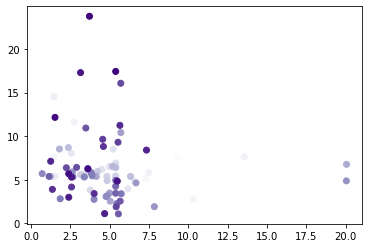

In [12]:
colors = cm.Purples(np.linspace(0,1,len(opt.y)))
fig = plt.figure()
ax = fig.gca()
ax.scatter(opt.y[:,0], opt.y[:,1], c=colors)

-3

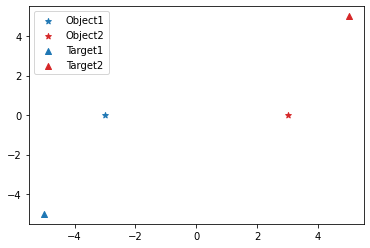

In [13]:
plt.scatter(func.o1_x, func.o1_y, c="C0", label = "Object1", marker="*")
plt.scatter(func.o2_x, func.o2_y, c="C3", label = "Object2", marker="*")
plt.scatter(func.t1_x, func.t1_y, c="C0", label = "Target1", marker="^")
plt.scatter(func.t2_x, func.t2_y, c="C3", label = "Target2", marker="^")
plt.legend()